In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [11]:
df = pd.read_csv('Netflix Userbase.csv')

In [12]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [13]:
df.shape

(2500, 10)

## Finding Null Values in the Dataset

In [14]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

## %of Male and Female Users

<Axes: ylabel='User ID'>

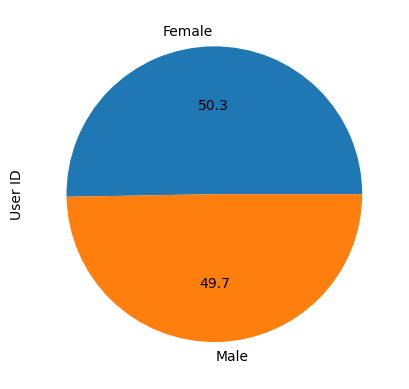

In [16]:
df.groupby('Gender')['User ID'].count().plot(kind = 'pie', autopct = '%.1f')

## Total Users per Country

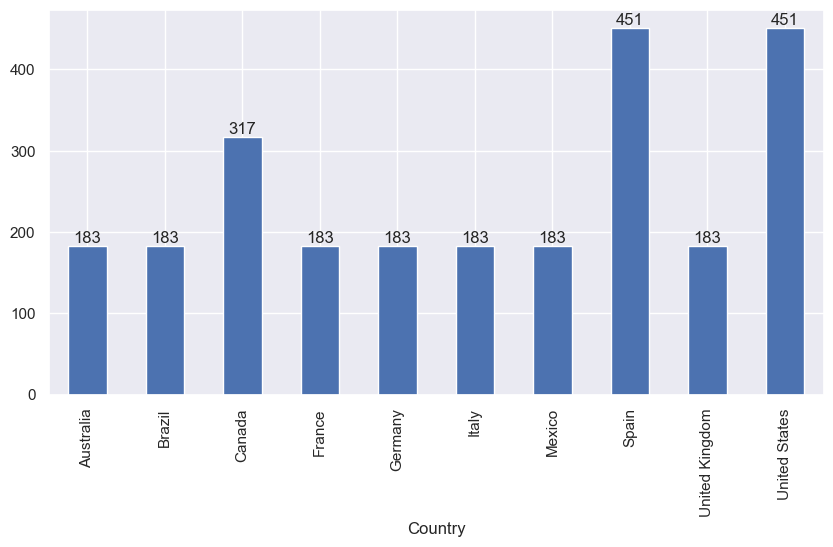

In [220]:
a = df.groupby('Country').size().plot(kind = 'bar',figsize = (10,5))

for bars in a.containers:
    a.bar_label(bars)

## Total Male and Female users per Country

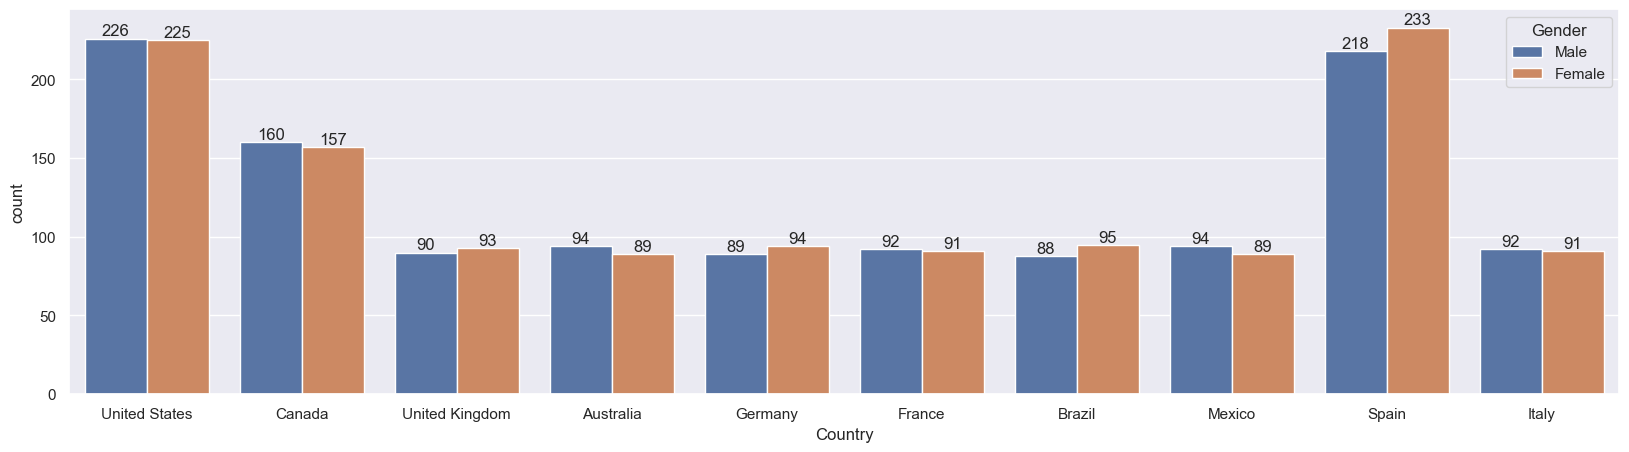

In [19]:
b = sns.countplot(x = 'Country',hue = 'Gender',data = df)
sns.set(rc={'figure.figsize':(20,5)})

for bars in b.containers:
    b.bar_label(bars)

In [20]:
df.head(2)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month


## Average User Age per Country

<Axes: xlabel='Country'>

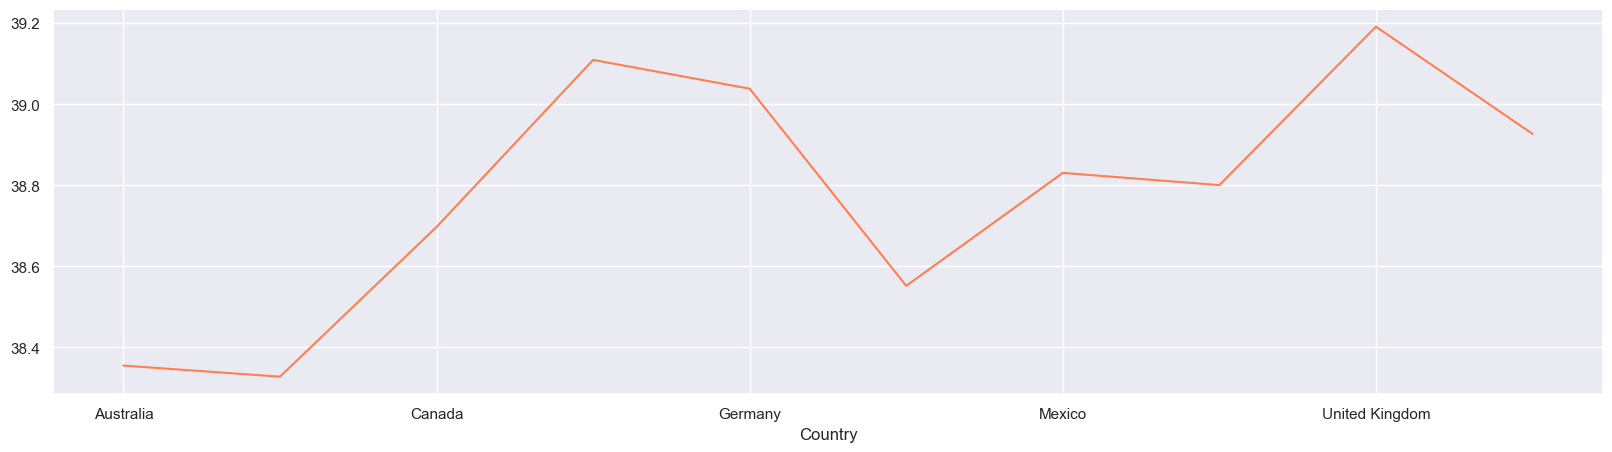

In [292]:
df.groupby('Country')['Age'].mean().plot(kind = 'line',color = 'coral')

## Device Used by Male and Female Users

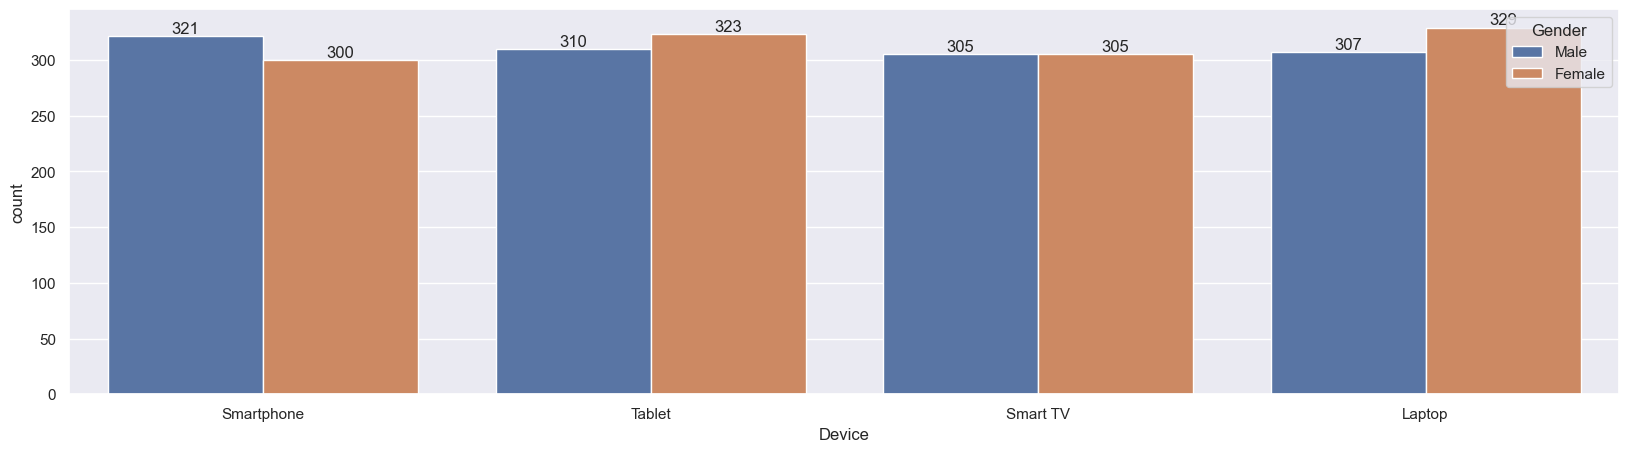

In [22]:
c = sns.countplot(hue = 'Gender',x = 'Device',data = df)
sns.set(rc={'figure.figsize':(20,5)})

for bars in c.containers:
    c.bar_label(bars)

In [31]:
df.groupby('Country')['Age'].describe().iloc[:,1:]

,mean,std,min,25%,50%,75%,max
Country,,,,,,,
Australia,38.355191,7.375305,27.0,32.0,38.0,45.0,51.0
Brazil,38.327869,7.420023,27.0,31.0,39.0,45.0,51.0
Canada,38.697161,7.015563,27.0,32.0,39.0,45.0,51.0
France,39.109290,7.253576,27.0,33.0,39.0,45.0,51.0
Germany,39.038251,6.594508,27.0,33.0,39.0,44.0,51.0
Italy,38.551913,7.248060,27.0,31.0,39.0,45.0,51.0
Mexico,38.830601,6.999116,27.0,33.0,39.0,45.0,51.0
Spain,38.800443,7.460420,27.0,32.0,39.0,45.0,51.0
United Kingdom,39.191257,6.747529,27.0,34.0,39.0,45.0,51.0


## % Users for each Subscription type

<Axes: >

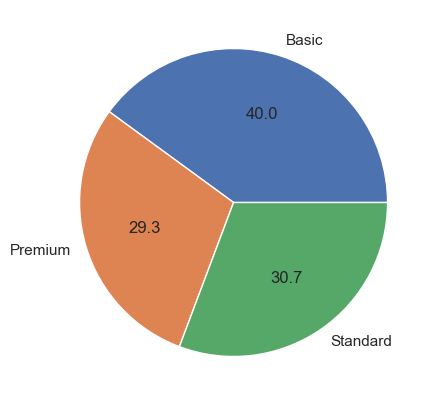

In [217]:
df.groupby('Subscription Type').size().plot(kind = 'pie',figsize = (10,5),autopct = '%.1f')

### Converting 'Join Date' to Datetime datatype

In [55]:
df['updated_date'] = pd.to_datetime(df['Join Date'], format = "%d-%m-%y")

In [58]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,updated_date
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,2022-01-15
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,2021-09-05
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2023-02-28
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,2022-07-10
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,2023-05-01


### Printing today's date

In [101]:
today_date = pd.to_datetime(pd.Timestamp.today().date())

print(today_date)

2023-07-06 00:00:00


## Calculating the no. of days between Today and the 'Join Date'

In [102]:
df['No_of_days'] = today_date - df['updated_date']

In [103]:
df.head(2)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,updated_date,No_of_days
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,2022-01-15,537 days
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,2021-09-05,669 days


In [104]:
df['No_of_days'].dtype

dtype('<m8[ns]')

## Converting the 'No_of_Days' from Datetime to integer for analysis

In [164]:
results = []  

for element in df['No_of_days']:
    split_elements = str(element).split(' ')
    if split_elements:  
        results.append(split_elements[0])

df['Days'] = results
df['Days'] = df['Days'].astype(int)

## Selecting the users from each country who have been subscribers for more than 1 year

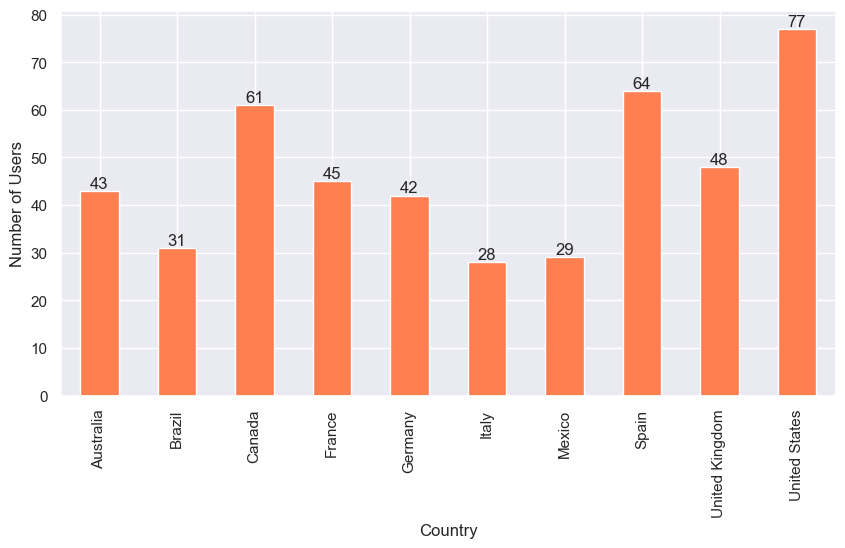

In [196]:
data = df[df['Days']>365]

groups = data.groupby('Country').size().plot(kind = 'bar',color = 'coral',figsize = (10,5),ylabel = 'Number of Users')

for bars in groups.containers:
    groups.bar_label(bars)

In [199]:
df.head(2)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,updated_date,No_of_days,Days
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,2022-01-15,537 days,537
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,2021-09-05,669 days,669


## Monthly revenue generated from each country

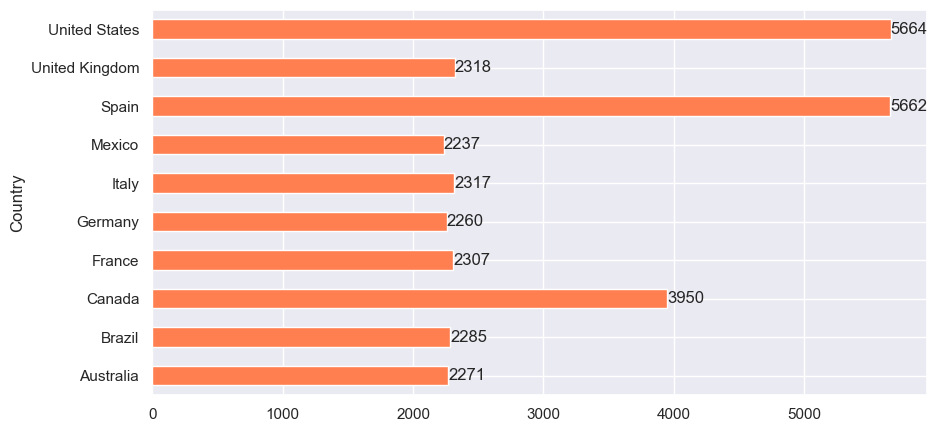

In [212]:
h = df.groupby('Country')['Monthly Revenue'].sum().plot(kind = 'barh', color = 'coral',figsize = (10,5))

for bars in h.containers:
    h.bar_label(bars)

## No. of Days left for next payment cycle

In [322]:
df['Last Payment Date updated'] = pd.to_datetime(df['Last Payment Date'], format = "%d-%m-%y")

df['Days_from_last_payment'] = (today_date - df['New_date'])

payment = []  

for j in df['Days_from_last_payment']:
    split_j = str(j).split(' ')
    if split_j:  
        payment.append(split_j[0])

df['Payment_due_in_days'] = payment
df['Payment_due_in_days'] = 30 - df['Payment_due_in_days'].astype(int)

KeyError: 'Last Payment Date'

In [290]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration,updated_date,No_of_days,Days,Last Payment Date updated,Days_from_last_payment,Payment_due_in_days,Status
0,1,Basic,10,United States,28,Male,Smartphone,1 Month,2022-01-15,537 days,537,2023-06-10,26 days,4,Your plan is expiring soon
1,2,Premium,15,Canada,35,Female,Tablet,1 Month,2021-09-05,669 days,669,2023-06-22,14 days,16,Netflix and Chill!
2,3,Standard,12,United Kingdom,42,Male,Smart TV,1 Month,2023-02-28,128 days,128,2023-06-27,9 days,21,Netflix and Chill!
3,4,Standard,12,Australia,51,Female,Laptop,1 Month,2022-07-10,361 days,361,2023-06-26,10 days,20,Netflix and Chill!
4,5,Basic,10,Germany,33,Male,Smartphone,1 Month,2023-05-01,66 days,66,2023-06-28,8 days,22,Netflix and Chill!


In [299]:
status = []

for k in df['Payment_due_in_days']:
    if k <= 7 and k > 0:
        status.append('Your plan is expiring soon!')
    elif k >= 30:
        status.append('Your plan has expired. Please recharge again!')    
    else:
        status.append('Netflix and Chill!')
        
df['Status'] = status

<Axes: ylabel='count'>

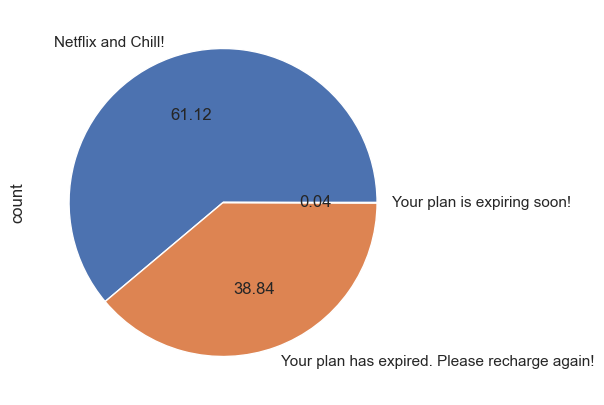

In [300]:
df['Status'].value_counts().sort_values(ascending = False).plot(kind = 'pie',figsize = (10,5),autopct = '%.02f')

In [317]:
date_updated = []

for g in df['Last Payment Date updated']:
    if g > today_date:
        date_updated.append(today_date)
    else:
        date_updated.append(g)
        
df['New_date'] = date_updated

In [333]:
df['Days_from_last_payment1'] = (today_date - df['New_date'])

payments = [] 

for l in df['Days_from_last_payment1']:
    split_l = str(l).split(' ')
    if split_l:  
        payments.append(split_j[0])

df['Payment_due_in_days1'] = payments
df['Payment_due_in_days1'] = df['Payment_due_in_days1'].astype(int)

In [334]:
df

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration,updated_date,No_of_days,Days,Last Payment Date updated,Days_from_last_payment,Payment_due_in_days,Status,New_date,Days_from_last_payment1,Payment_due_in_days1
0,1,Basic,10,United States,28,Male,Smartphone,1 Month,2022-01-15,537 days,537,2023-06-10,26 days,4,Your plan is expiring soon!,2023-06-10,26 days,0
1,2,Premium,15,Canada,35,Female,Tablet,1 Month,2021-09-05,669 days,669,2023-06-22,14 days,16,Netflix and Chill!,2023-06-22,14 days,0
2,3,Standard,12,United Kingdom,42,Male,Smart TV,1 Month,2023-02-28,128 days,128,2023-06-27,9 days,21,Netflix and Chill!,2023-06-27,9 days,0
3,4,Standard,12,Australia,51,Female,Laptop,1 Month,2022-07-10,361 days,361,2023-06-26,10 days,20,Netflix and Chill!,2023-06-26,10 days,0
4,5,Basic,10,Germany,33,Male,Smartphone,1 Month,2023-05-01,66 days,66,2023-06-28,8 days,22,Netflix and Chill!,2023-06-28,8 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,Spain,28,Female,Smart TV,1 Month,2022-07-25,346 days,346,2023-07-12,0 days,36,Your plan has expired. Please recharge again!,2023-07-06,0 days,0
2496,2497,Basic,15,Spain,33,Female,Smart TV,1 Month,2022-08-04,336 days,336,2023-07-14,0 days,38,Your plan has expired. Please recharge again!,2023-07-06,0 days,0
2497,2498,Standard,12,United States,38,Male,Laptop,1 Month,2022-08-09,331 days,331,2023-07-15,0 days,39,Your plan has expired. Please recharge again!,2023-07-06,0 days,0
2498,2499,Standard,13,Canada,48,Female,Tablet,1 Month,2022-08-12,328 days,328,2023-07-12,0 days,36,Your plan has expired. Please recharge again!,2023-07-06,0 days,0
